In [37]:
# 第3回データサイエンス入門

import pandas as pd  # 表形式のデータを扱うために pandas を使用する
kakei = pd.read_csv("Pythonデータサイエンス入門/kakei.csv", encoding="Shift_JIS")  # 家計調査年報データを読み込む

kakei[kakei["収支分類区分3"] == "米"].head()

,調査年,世帯分類区分,地域分類区分,収支分類区分1,収支分類区分2,収支分類区分3,支出金額
121,2008,二人以上の世帯,全国,食料,穀類,米,2485
122,2009,二人以上の世帯,全国,食料,穀類,米,2419
123,2010,二人以上の世帯,全国,食料,穀類,米,2276
124,2011,二人以上の世帯,全国,食料,穀類,米,2193
125,2012,二人以上の世帯,全国,食料,穀類,米,2290


移動平均の項数を入力してください：3
調査年
2008            NaN
2009    2393.333333
2010    2296.000000
2011    2253.000000
2012    2240.666667
2013    2174.666667
2014    2018.666667
2015    1895.666667
2016    1859.000000
2017    1901.000000
2018            NaN
Name: 支出金額, dtype: float64


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25903 (\N{CJK UNIFIED IDEOGRAPH-652F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nishiyamashoutou/opt/anaconda

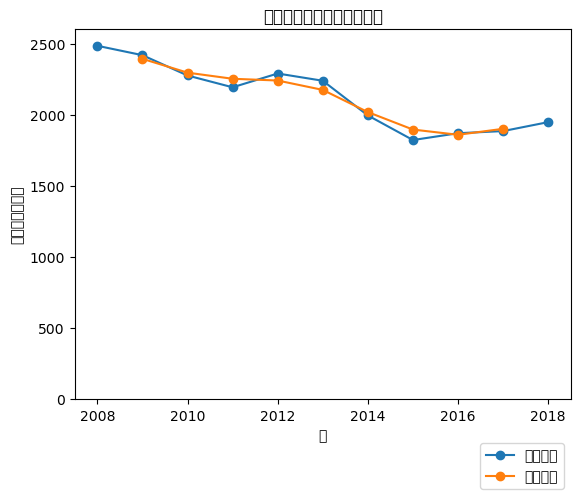

In [38]:
#(1) 移動平均モデル

import matplotlib.pyplot as plt # グラフを作成するために matplotlib を使用する


# コード4.11 支出金額の移動平均の計算
# 米の支出金額のみを取り出す
rice = kakei[kakei["収支分類区分3"] == "米"]

# 項数に応じて期間の中心の年の支出金額の移動平均を計算
rice.index = rice["調査年"]
n = int(input("移動平均の項数を入力してください："))
ma_rice = rice["支出金額"].rolling(n, center=True).mean()
print(ma_rice)

# 年ごとの支出金額
## 元データの描画設定
plt.plot(rice.index, rice["支出金額"], label="生データ", marker='o')
## 移動平均を求めたデータの描画設定
plt.plot(ma_rice.index, ma_rice, label="移動平均", marker='o')
## グラフの要素設定
plt.title("各年の支出金額の移動平均")
plt.xlabel("年")
plt.ylabel("支出金額（円）")
plt.ylim(0, 2600)
plt.legend(bbox_to_anchor=(1, -0.1), loc='upper right')
plt.show()

調査年
2008         NaN
2009         NaN
2010   -4.066852
2011   -1.872822
2012   -0.547418
2013   -2.945552
2014   -7.173513
2015   -6.093131
2016   -1.934236
2017    2.259279
2018         NaN
Name: 支出金額, dtype: float64


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31859 (\N{CJK UNIFIED IDEOGRAPH-7C73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22793 (\N{CJK UNIFIED IDEOGRAPH-5909}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nishiyamashoutou/opt/

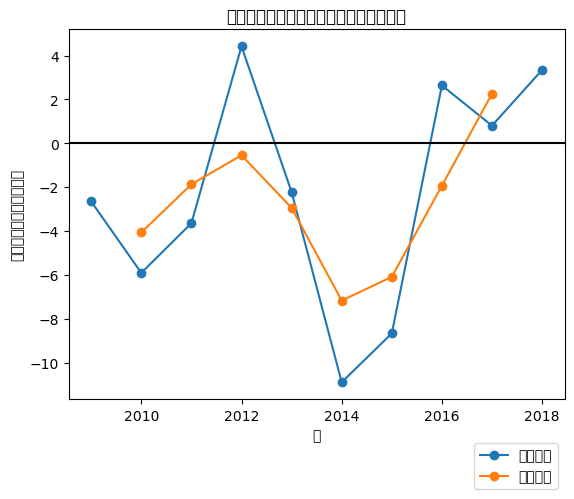

In [39]:
# コード4.12 支出金額の変化率の移動平均の計算
# 支出金額の変化率を計算する
raw = rice["支出金額"].pct_change() * 100
ma_change = ma_rice.pct_change() * 100
ma_change[2018] = None # 変化率の計算で最後の年が 0 になるため無効にする
print(ma_change)

## 変化率のグラフを描画する
plt.plot(raw.index, raw, label="生データ", marker='o')
plt.plot(ma_change.index, ma_change, label="移動平均", marker = 'o')
plt.title("各年の米の支出金額の変化率の移動平均")
plt.xlabel("年")
plt.ylabel("支出金額の変化率（％）")
plt.legend(bbox_to_anchor=(1, -0.1), loc='upper right')
plt.axhline(0, color="black")
plt.show()

In [40]:
#(2) 指数平滑化モデル

# コード4.13 指数平滑法による予測値を計算する関数
import numpy as np

def calc_forecasted_value(df, alpha):
    """
    指数平滑法を用いて予測値を計算する関数
    """
    # データフレームのコピーを作成
    res = df.copy()
    # 時間の列をインデックスに設定
    res.index = res["調査年"]
    
    # 予測値を格納する辞書（キー：調査年）
    forecasted = {res.index[0]: np.nan}  # 最初の年は予測できないので NaN
    forecasted[res.index[1]] = res.at[res.index[0], "支出金額"]  # 最初の年の値を次の年の予測値とする
    # 予測値を順次求めていく
    for t in range(2, len(res)):
        pre_year = res.index[t - 1]
        year_t = res.index[t]
        forecasted[year_t] = alpha * res.at[pre_year, "支出金額"] + (1 - alpha) * forecasted[pre_year]
    
    # 辞書の値（予測値）を列として追加
    res.loc[:, "予測値"] = forecasted.values()
    # 予測値と実測値から予測誤差を計算
    res["予測誤差"] = abs(res["支出金額"] - res["予測値"])
    
    return res

0.1    2884.057629
0.2    2187.646950
0.3    1706.454003
0.4    1396.606585
0.5    1229.632812
0.6    1125.697778
0.7    1054.052903
0.8    1006.397102
0.9     999.916026
dtype: float64


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12497 (\N{KATAKANA LETTER PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12513 (\N{KATAKANA LETTER ME}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nishiyamashoutou/opt/anaconda3/en

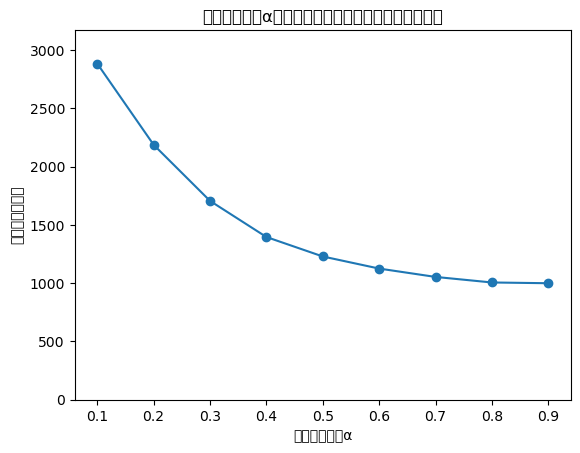

In [41]:
# コード4.14 係数  𝛼  ごとの予測誤差の合計値の計算

# 予測のパラメータ α の候補
param_alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# パラメータごとの予測誤差の合計の辞書
total_error = {}
# パラメータを変えながら予測
for alpha in param_alpha:
    ## 予測値を計算する
    rice_f = calc_forecasted_value(rice, alpha)
    ## 予測誤差の合計値を計算して辞書へ追加
    te = sum(rice_f.loc[rice_f.index[1:], "予測誤差"])  # 最初の年は NaN なので除外
    total_error[str(alpha)] = te  # αの値を文字列化して辞書のキーとする

# グラフ描画のために pandas.Series へ変換
res = pd.Series(total_error)
print(res)

# パラメータ α ごとの予測誤差を描画
plt.plot(res.index, res, marker='o')
plt.title("パラメーターαごとの実測値と予測値との誤差の合計")
plt.xlabel("パラメーターα")
plt.ylabel("予測誤差の合計")
plt.ylim(0, max(res) * 1.1)
plt.show()

In [42]:
# 第4回データサイエンス入門

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
from sklearn.metrics import r2_score

df = pd.read_csv("Pythonデータサイエンス入門/choco_ice.csv", encoding="sjis")
df

,日最高気温の平均(℃),year,month,チョコレート【円/日】,アイスクリーム・シャーベット【円/日】,feb
0,17.0,2009,11,12.166667,13.400000,0
1,12.4,2009,12,15.032258,14.193548,0
2,11.0,2010,1,14.709677,11.677419,0
3,9.9,2010,2,40.071429,10.892857,1
4,13.2,2010,3,13.193548,12.354839,0
...,...,...,...,...,...,...
109,12.1,2018,12,22.645161,17.322581,0
110,10.3,2019,1,25.451613,15.935484,0
111,11.6,2019,2,49.428571,15.107143,1
112,15.4,2019,3,22.935484,17.483871,0


a = 1.258294425953385
b = -3.0113123722258823


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27671 (\N{CJK UNIFIED IDEOGRAPH-6C17}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nishiyamashoutou/opt/

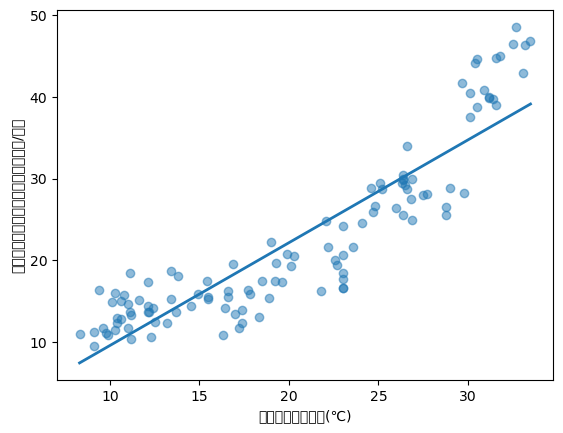

In [43]:
#(3) 線形単回帰

#  コード1：線形単回帰
x_name = '日最高気温の平均(℃)'
y_name = 'アイスクリーム・シャーベット【円/日】'

x = df[x_name].values
y = df[y_name].values

a, b = np.polyfit(x, y, deg=1)

print("a =", a)
print("b =", b)
r2 = r2_score(y, a*x + b)

# アイスクリームの回帰直線
plt.scatter(x, y, alpha=0.5)
x_minmax = np.array([x.min(), x.max()])
y_pred = a * x_minmax + b
plt.plot(x_minmax, y_pred, linewidth=2)
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.show()

a2 = 0.07328619170954306
a1 = -1.76397523912247
b = 23.963852729749963
r2 = 0.9185373428645626


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27671 (\N{CJK UNIFIED IDEOGRAPH-6C17}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nishiyamashoutou/opt/

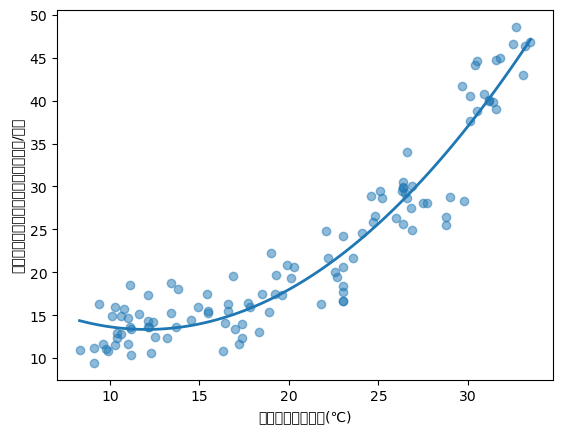

In [44]:
# コード2：次数2の単回帰
x_name = '日最高気温の平均(℃)'
y_name = 'アイスクリーム・シャーベット【円/日】'

x = df[x_name].values
y = df[y_name].values
a2, a1, b = np.polyfit(x, y, deg=2)

print("a2 =", a2)
print("a1 =", a1)
print("b =", b)
r2 = r2_score(y, a2 * x**2 + a1 * x + b)
print("r2 =", r2)

# アイスクリームの回帰曲線
plt.scatter(x, y, alpha=0.5)
x_minmax = np.linspace(x.min(), x.max(), 100)
y_pred = a2 * x_minmax**2 + a1 * x_minmax + b
plt.plot(x_minmax, y_pred, linewidth=2)
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.show()

a2 = 26.94512356827463
a1 = -0.5581926447945164
b = 24.090964365682865
r2 = 0.9248549038735874


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27671 (\N{CJK UNIFIED IDEOGRAPH-6C17}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nishiyamashoutou/opt/

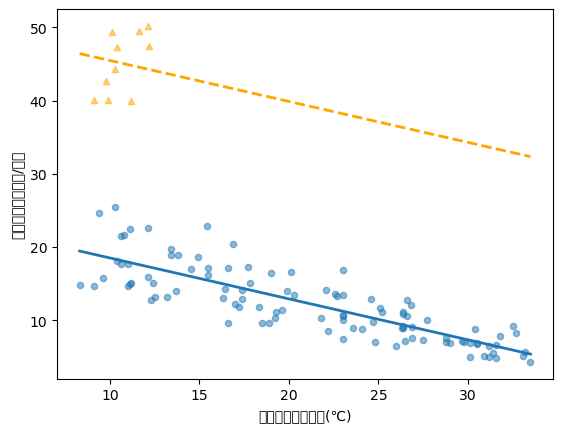

In [45]:
#(4) 重回帰

# コード3：説明変数が2つの場合の重回帰
from sklearn.linear_model import LinearRegression

x = df[['日最高気温の平均(℃)', 'feb']].values
y = df['チョコレート【円/日】'].values

lr = LinearRegression()
lr.fit(x, y)
a1, a2 = lr.coef_
b = lr.intercept_
r2 = r2_score(y, a1 * x[:,0] + b + a2 * x[:,1])

print("a2 =", a2)
print("a1 =", a1)
print("b =", b)
print("r2 =", r2)


# ダミー変数を導入したチョコレートの回帰直線
x_minmax = np.array([x[:,0].min(), x[:,0].max()])
y_pred = a1 * x_minmax + b
x_name = "日最高気温の平均(℃)"
y_name = "チョコレート【円/日】"
ax = df[df.feb==0].plot(kind='scatter', x=x_name, y=y_name, alpha=0.5)
df[df.feb==1].plot(kind='scatter', x=x_name, y=y_name, marker='^', ax=ax, alpha=0.5, color="orange")
plt.plot(x_minmax, y_pred, linewidth=2)
plt.plot(x_minmax, y_pred + a2, linewidth=2, linestyle="dashed", color="orange")
plt.show()

In [46]:
#(5) 最小二乗法

In [47]:
#(6) サポートベクターマシン (関数系で予測出来てたら性能比較対象として採用)

In [48]:
#第5回・第6回 Pythonによる機械学習入門

係数 [[3.]]
切片 [-2.]


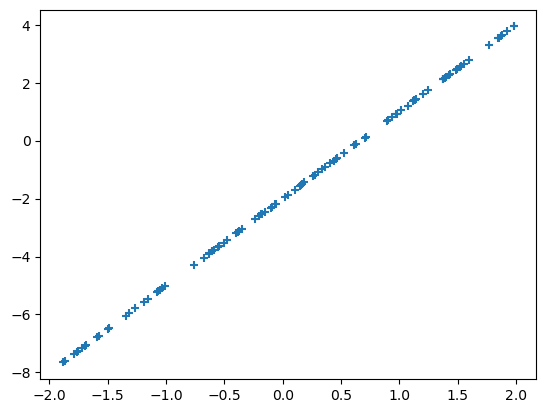

In [49]:
#(7) 線形単回帰

import matplotlib.pyplot as plt
import numpy as np


### y = 3x -2 のデータを作成
x = np.random.rand(100, 1)  # 0 〜 1 までの乱数を 100 個つくる
x = x * 4 - 2  # 値の範囲を -2 〜 2 に変更
y = 3 * x - 2  # y = 3x - 2


### 学習
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x, y)


### 係数、切片を表示
print('係数', model.coef_)
print('切片', model.intercept_)


### グラフ表示
plt.scatter(x, y, marker='+')
plt.show()

係数 [[3.04882275]]
切片 [-2.12225381]
決定係数 0.9308000210832638


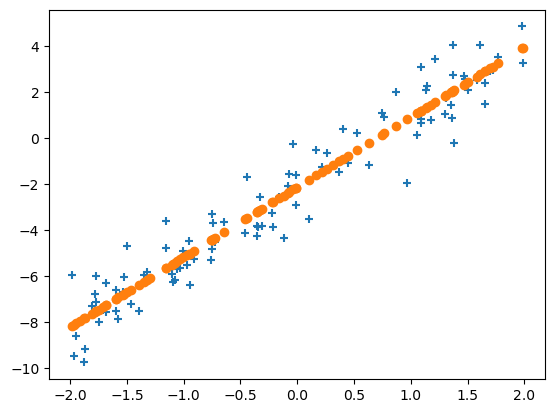

In [50]:
## バラつきのある y = 3x -2 のデータを作成
x = np.random.rand(100, 1)  # 0 〜 1 までの乱数を 100 個つくる
x = x * 4 - 2               # 値の範囲を -2 〜 2 に変更
y = 3 * x - 2  # y = 3x - 2
y += np.random.randn(100, 1)  # 標準正規分布（平均 0, 標準偏差 1）の乱数を加える


### 学習
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x, y)


### 係数、切片、決定係数を表示
print('係数', model.coef_)
print('切片', model.intercept_)
r2 = model.score(x, y)
print('決定係数', r2)


### グラフ表示
plt.scatter(x, y, marker ='+')
plt.scatter(x, model.predict(x), marker='o')
plt.show()

係数 [[ 3. -2.]]
切片 [1.]
決定係数 1.0


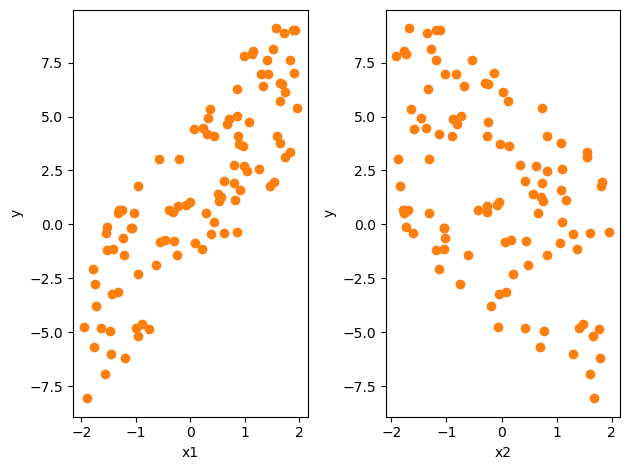

In [51]:
#(8) 重回帰

import matplotlib.pyplot as plt
import numpy as np


### y = 3x_1 - 2x_2 + 1 のデータを作成
x1 = np.random.rand(100, 1)  # 0 〜 1 までの乱数を 100 個つくる
x1 = x1 * 4 - 2              # 値の範囲を -2 〜 2 に変更
x2 = np.random.rand(100, 1)  # x2 についても同様
x2 = x2 * 4 - 2
y = 3 * x1 - 2 * x2 + 1


### 学習
from sklearn import linear_model
x1_x2 = np.c_[x1, x2]  # [[x1_1, x2_1], [x1_2, x2_2], ..., [x1_100, x2_100]] という形に変換
model = linear_model.LinearRegression()
model.fit(x1_x2, y)


### 係数、切片、決定係数を表示
print('係数', model.coef_)
print('切片', model.intercept_)
print('決定係数', model.score(x1_x2, y))


### グラフ表示
y_ = model.predict(x1_x2)  # 求めた回帰式で予測
plt.subplot(1, 2, 1)
plt.scatter(x1, y, marker='+')
plt.scatter(x1, y_, marker='o')
plt.xlabel('x1')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.scatter(x2, y, marker='+')
plt.scatter(x2, y_, marker='o')
plt.xlabel('x2')
plt.ylabel('y')

plt.tight_layout()
plt.show()

係数 [[ 2.80045301 -2.06745667]]
切片 [0.95419576]
決定係数 0.9267948515376287


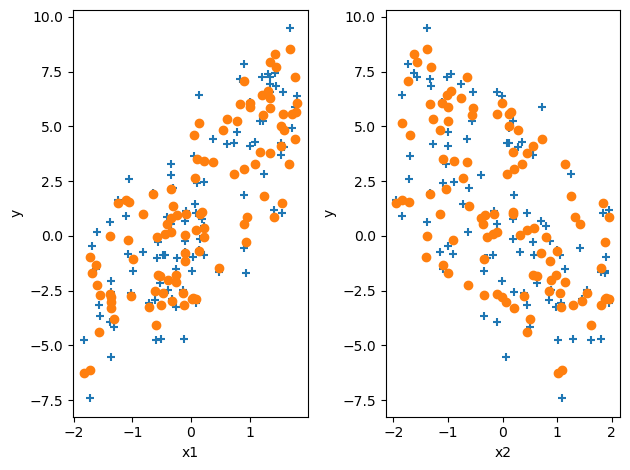

In [52]:
import matplotlib.pyplot as plt
import numpy as np


### バラつきのある y = 3x_1 - 2x_2 + 1 のデータを作成

x1 = np.random.rand(100, 1)  # 0 〜 1 までの乱数を 100 個つくる
x1 = x1 * 4 - 2              # 値の範囲を -2 〜 2 に変更
x2 = np.random.rand(100, 1)  # x2 についても同様
x2 = x2 * 4 - 2
y = 3 * x1 - 2 * x2 + 1
y += np.random.randn(100, 1)  # 標準正規分布（平均 0, 標準偏差 1）の乱数を加える


### 学習
from sklearn import linear_model
x1_x2 = np.c_[x1, x2]  # [[x1_1, x2_1], [x1_2, x2_2], ..., [x1_100, x2_100]] という形に変換
model = linear_model.LinearRegression()
model.fit(x1_x2, y)


### 係数、切片、決定係数を表示
print('係数', model.coef_)
print('切片', model.intercept_)
print('決定係数', model.score(x1_x2, y))


### グラフ表示
y_ = model.predict(x1_x2)  # 求めた回帰式で予測

plt.subplot(1, 2, 1)
plt.scatter(x1, y, marker='+')
plt.scatter(x1, y_, marker='o')
plt.xlabel('x1')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.scatter(x2, y, marker='+')
plt.scatter(x2, y_, marker='o')
plt.xlabel('x2')
plt.ylabel('y')

plt.tight_layout()
plt.show()

In [53]:
import math

import numpy as np
import matplotlib.pyplot as plt


### バラつきのある正弦波データを作成

x = np.random.rand(1000, 1)  # 0 〜 1 までの乱数を 1000 個つくる
x = x * 20 - 10              # 値の範囲を -10 〜 10 に変更

y = np.array([math.sin(v) for v in x])  # 正弦波カーブ
y += np.random.randn(1000)  # 標準正規分布（平均 0, 標準偏差 1）の乱数を加える

係数 [0.00854199]
切片 0.03196751109452595
決定係数 0.0016311938084717648


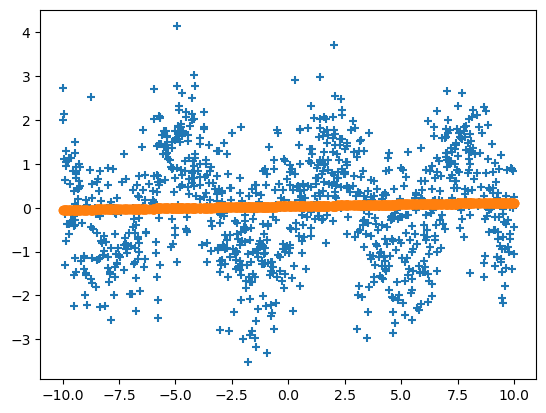

In [54]:
#(9) 最小二乗法

from sklearn import linear_model


model = linear_model.LinearRegression()
model.fit(x, y)


### 係数、切片、決定係数を表示

print('係数', model.coef_)
print('切片', model.intercept_)

r2 = model.score(x, y)
print('決定係数', r2)


### グラフ表示

plt.scatter(x, y, marker='+')
plt.scatter(x, model.predict(x), marker='o')
plt.show()

決定係数 0.13256364995138092


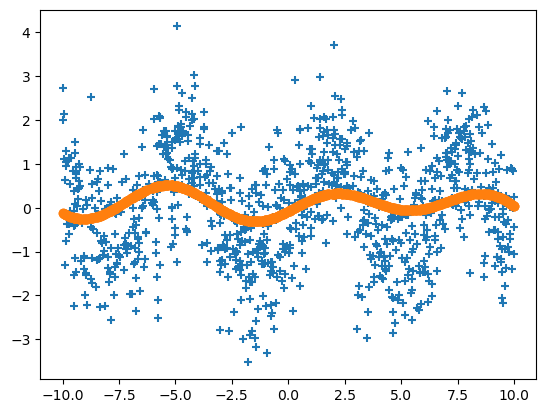

In [55]:
#(10) サポートベクターマシン (関数系で予測出来てたら性能比較対象として採用)

from sklearn import svm
import matplotlib.pyplot as plt

model = svm.SVR()
model.fit(x, y)


### 決定係数を表示
r2 = model.score(x, y)

print('決定係数', r2)


### グラフ表示

plt.scatter(x, y, marker='+')
plt.scatter(x, model.predict(x), marker='o')
plt.show()

In [71]:
#第9回 知識ゼロからの機械学習入門

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import datasets

import pandas_datareader.data as dr
stock=dr.DataReader('AAPL',"stooq")
stock.head()

stock['Next_High']=stock['High'].shift(1)
stock.head()

stock.isnull().sum()
stock=stock.dropna()
stock.shape

data_columns=['Open','High','Low','Close','Volume']
test_rows=500
target=stock['Next_High']
data=stock[data_columns]

target_train=target[test_rows:]
target_test=target[:test_rows]
data_train=data[test_rows:]
data_test=data[:test_rows]

Date
2020-11-06    120.7420
2020-11-05    117.9860
2020-11-04    118.1960
2020-11-03    114.2010
2020-11-02    110.1570
                ...   
2017-11-10     41.5483
2017-11-09     41.7650
2017-11-08     41.7850
2017-11-07     41.8169
2017-11-06     41.5503
Name: Next_High, Length: 757, dtype: float64
Date
2022-11-02    142.800
2022-11-01    152.170
2022-10-31    155.450
2022-10-28    154.240
2022-10-27    157.500
               ...   
2020-11-13    119.754
2020-11-12    118.455
2020-11-11    119.304
2020-11-10    118.416
2020-11-09    116.378
Name: Next_High, Length: 500, dtype: float64
                Open      High       Low     Close        Volume
Date                                                            
2020-11-06  117.1070  117.9860  114.9400  117.4770  1.156401e+08
2020-11-05  116.5380  118.1960  115.4800  117.6070  1.279127e+08
2020-11-04  112.7730  114.2010  111.0160  113.5720  1.399042e+08
2020-11-03  108.3490  110.1570  107.4310  109.1280  1.089236e+08
2020-11-02  107

4.494091657027492

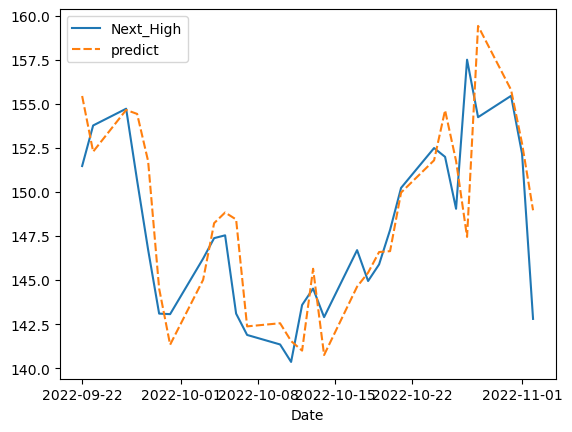

In [72]:
# (11) 線形(単)回帰

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(data_train,target_train)

target_predict=model.predict(data_test)
result=pd.DataFrame(target_test)
result['predict']=target_predict

sns.lineplot(data=result[:30])

mean_squared_error(target_test,target_predict)

/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.591e+01, tolerance: 3.996e+01
  model = cd_fast.enet_coordinate_descent(


4.482488480257969

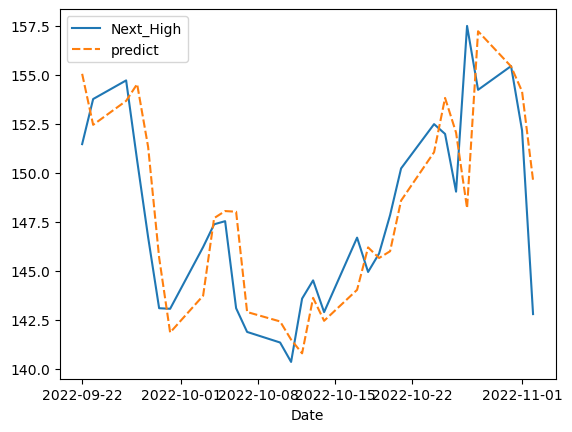

In [73]:
#(12) Lasso回帰

from sklearn.linear_model import Lasso
model=Lasso()
model.fit(data_train,target_train)

target_predict=model.predict(data_test)
result=pd.DataFrame(target_test)
result['predict']=target_predict

sns.lineplot(data=result[:30])

mean_squared_error(target_test,target_predict)

/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.10863e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


4.491807851245023

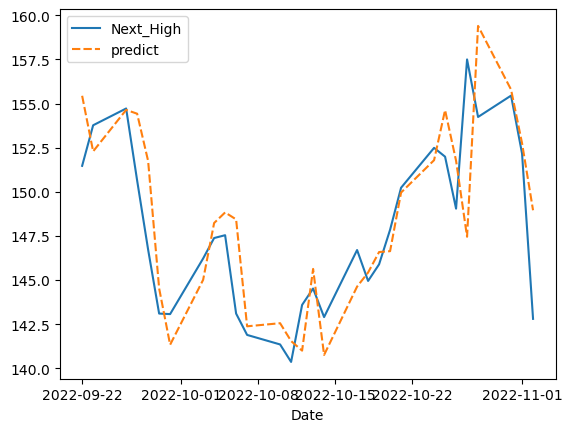

In [69]:
#(13) Ridge回帰

from sklearn.linear_model import Ridge
model=Ridge(alpha=1.0)

model.fit(data_train,target_train)

target_predict=model.predict(data_test)
result=pd.DataFrame(target_test)
result['predict']=target_predict

sns.lineplot(data=result[:30])

mean_squared_error(target_test,target_predict)

/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.133e+01, tolerance: 3.996e+01
  model = cd_fast.enet_coordinate_descent(


4.6909132259938255

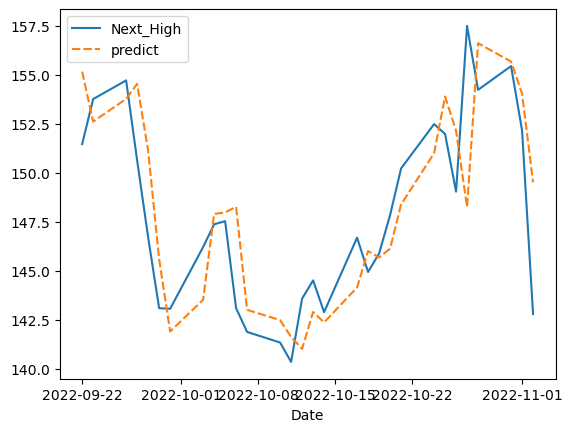

In [70]:
#(14) Elastic回帰

from sklearn.linear_model import ElasticNet
model=ElasticNet()

model.fit(data_train,target_train)

target_predict=model.predict(data_test)
result=pd.DataFrame(target_test)
result['predict']=target_predict

sns.lineplot(data=result[:30])

mean_squared_error(target_test,target_predict)

In [75]:
#第12回 日経ソフトウェア2022年7月号

import pandas as pd
df = pd.read_csv("日経ソフトウェア2022年7月/ice_sales.csv")
df.head()

,temp,sales
0,7.5,5.8
1,8.0,8.2
2,11.1,8.9
3,16.2,10.3
4,21.3,10.4


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


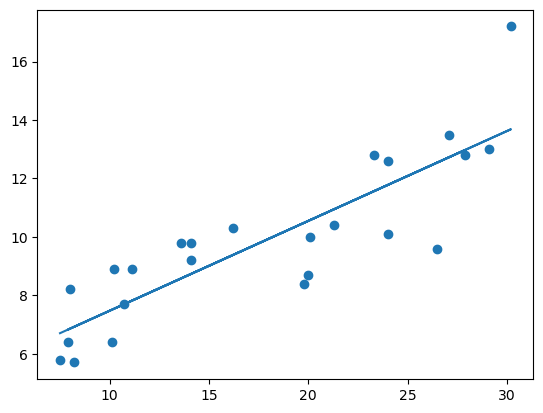

In [76]:
# 線形回帰(ライブラリ使用)

x = df.temp.to_frame()
y = df.sales

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x, y)

lr.predict([[30]])

lr.score(x, y)

import matplotlib.pyplot as plt
plt.scatter(df.temp, df.sales)
plt.plot(df.temp, lr.predict(x))
plt.show()

In [78]:
# 線形回帰(ライブラリ未使用)

def myFit(x, y):
  s = 0   # 各データからの距離の2乗の総和
  min_s = 1000000   # 最小のsを初期化
  
  # 傾きと切片の取り得る最大値を計算
  res = []
  for i in range(len(x) - 1):
    res.append((y[i+1] - y[i]) / (x[i+1] - x[i]))
  max_a = (sum(res) / len(res))   # 傾きの取り得る最大値
  max_b = sum(y) / len(y)   # 切片の取り得る最大値

  tick_max_a = [i/10 for i in range(int(max_a+1)*10)]
  tick_max_b = [i/10 for i in range(int(max_b+1)*10)]

  # tmp_bを0から0.1ずつmax_bまで変化させる
  for tmp_b in tick_max_b:    
    # tmp_aを0から0.1ずつmax_aまで変化させる
    for tmp_a in tick_max_a:   
      # 各データからの距離の2乗の総和（s）を求める
      for i in range(len(x)):   
      
        s = s + (y[i] - (tmp_a * x[i] + tmp_b))**2 
      
      if min_s > s :   # sが最小かどうかを判定する
        min_s = s
        min_a = round(tmp_a, 1)
        min_b = round(tmp_b, 1)
        
      s = 0
    tmp_a = 0
    
  print("回帰式：y =", min_a, "* x +", min_b)
  
  return min_a, min_b

In [77]:
import numpy as np

x = [2, 4, 6]
y = [2, 3, 5]

a, b = myFit(x, y)

# テストデータ
x = [6, 7, 8, 10, 12, 15, 19, 20]
y = [7, 3, 5,  6, 10,  3, 10, 12]

a, b = myFit(x, y)

coe = np.polyfit(x, y, 1)
a = coe[0]
b = coe[1]
print("回帰式：y =", a, "* x +", b)

a, b = myFit(df.temp, df.sales)

def myPredict(val, a, b):
  y = a * val + b
  return y

sales = myPredict(30, a, b)
print(sales)

NameError: name 'myFit' is not defined

In [ ]:
# 第10回 AIデータサイエンスのための図解でわかる数学プログラミング

In [ ]:
import pandas as pd
df_info = pd.read_csv("AI-データサイエンスのための図解でわかる数学プログラミング/MathProgramming/Chapter1-jupyter/accomodation_info.csv", index_col=0, parse_dates=[0])
df_info

x = df_info['顧客ID'].value_counts()
x_hist,t_hist,_ = plt.hist(x,21,color="k")
plt.show()

In [ ]:
# 第1章 分布の近似曲線

import numpy as np
import matplotlib.pyplot as plt
import math

# パラメータ設定
epsiron = 1
num = 15

# 変数設定
weight = x_hist[1:num]
t = np.zeros(len(t_hist)-1)
for i in range(len(t_hist)-1):
    t[i] = (t_hist[i]+t_hist[i+1])/2

# フィッティング（最小二乗近似）によるパラメータの算出
a, b = np.polyfit(t[1:num], np.log(x_hist[1:num]), 1, w=weight)

# フィッティング曲線（直線）の描画
xt = np.zeros(len(t))
for i in range(len(t)):
    xt[i] = a*t[i]+b
plt.plot(t_hist[1:], np.log(x_hist+epsiron),marker=".",color="k")
plt.plot(t,xt,color="r")
plt.show()

In [ ]:
t = t_hist[1:]
xt = np.zeros(len(t))
for i in range(len(t)):
    xt[i] = math.exp(a*t[i]+b)

plt.bar(t_hist[1:], x_hist,width=8,color="k")
plt.plot(t,xt,color="r")
plt.show() 

In [ ]:
# 第2章 サポートベクトル回帰

# データの読み込み
import pandas as pd
df_info = pd.read_csv("AI-データサイエンスのための図解でわかる数学プログラミング/MathProgramming/Chapter2-jupyter/accomodation_info.csv", index_col=0, parse_dates=[0])
df_info

In [ ]:
# 特徴ベクトル可視化

import pandas as pd
import matplotlib.pyplot as plt
# indexの抽出
x_0 = df_info.resample('M').count()
x_0 = x_0.drop(x_0.columns.values,axis=1)
# 順位の設定
i_rank = 1
j_rank = 2
# 顧客IDの抽出
i_id = df_info['顧客ID'].value_counts().index[i_rank]
j_id = df_info['顧客ID'].value_counts().index[j_rank]
# 月ごとの利用回数を特徴量として抽出
x_i = df_info[df_info['顧客ID']==i_id].resample('M').count()
x_j = df_info[df_info['顧客ID']==j_id].resample('M').count()
# 欠損値があった場合の穴埋め
x_i = pd.concat([x_0, x_i], axis=1).fillna(0)
x_j = pd.concat([x_0, x_j], axis=1).fillna(0)
# 描画
plt.plot(x_i)
plt.plot(x_j)
plt.xticks(rotation=60)
plt.show()

In [ ]:
#  特徴ベクトル抽出

import pandas as pd
# indexの調整
x_0 = df_info.resample('M').count()
x_0 = x_0.drop(x_0.columns.values,axis=1)
# 配列を準備
list_vector = []
# 人数の設定
num = 100
for i_rank in range(num):
    # 顧客IDの抽出
    i_id = df_info['顧客ID'].value_counts().index[i_rank]
    # 月ごとの利用回数を特徴量として抽出
    x_i = df_info[df_info['顧客ID']==i_id].resample('M').count()
    # 欠損値があった場合の穴埋め
    x_i = pd.concat([x_0, x_i], axis=1).fillna(0)
    # 特徴ベクトルとして追加
    list_vector.append(x_i.iloc[:,0].values.tolist())

In [ ]:
# クラスタリング(k-means法)による分類

from sklearn.cluster import KMeans
# クラスター数を設定
num_of_cluster = 4
# クラスターに分類
model = KMeans(n_clusters=num_of_cluster, random_state=0)
model.fit(features)
pred_class = model.labels_
print(pred_class)

In [ ]:
# 目的変数・説明変数の設定

import numpy as np
# 分析したいクラスを設定する
target_class = 1
# 目的変数を作成する
num = len(pred_class)
data_o = np.zeros(num)
for i in range(num):
    if pred_class[i]==target_class:
        data_o[i] = True
    else:
        data_o[i] = False
print(data_o)

data_e = features  # 説明変数を作成する
print(data_e)

In [ ]:
# サポートベクトル回帰

from sklearn import svm
from sklearn.model_selection import train_test_split

# データを作成
data_target = data_e[data_o==1]
data_y = data_target
data_x = np.stack([np.arange(0,len(data_target[0])) for _ in range(len(data_target))], axis=0)
data_y = np.ravel(data_y)
data_x = np.ravel(data_x)

# データセットを訓練データとテストデータに分割
x_train, x_test, y_train, y_test = train_test_split(data_x,data_y)

# 訓練データによるモデル構築（サポートベクトル回帰）
model = svm.SVR(kernel='rbf', C=1)
reg = model.fit(x_train.reshape(-1, 1),y_train.reshape(-1, 1))

# 予測曲線を描画
x_pred = np.arange(len(data_target[0])).reshape(-1, 1)
y_pred = model.predict(x_pred)
plt.plot(data_x,data_y,"k.")
plt.plot(x_pred,y_pred,"r.-")
plt.show()

# 決定係数R^2
reg.score(x_test.reshape(-1, 1),y_test.reshape(-1, 1))

In [62]:
# 第14回 Pythonコンピュータシミュレーション入門

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA

from scipy import stats

np.random.seed(123)

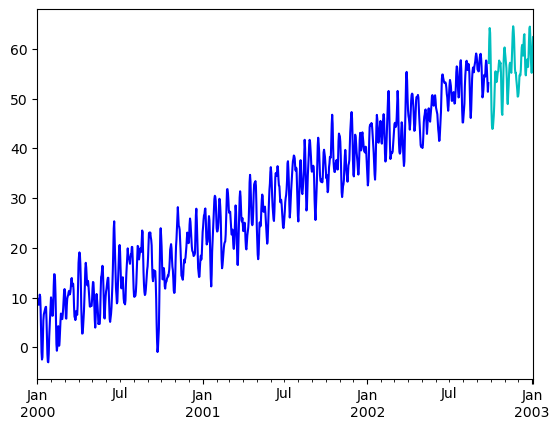

In [63]:
ar = [1, -1.5, 0.7]
ma = [1.0, 0.6]

nobs = 1000
nobs_test = 100
nobs_all = nobs + nobs_test

dist = stats.norm(loc=0, scale=1.0).rvs

# 知りたい信号成分
sig_all = arma_generate_sample(ar, ma, nsample=nobs_all, distrvs=dist, burnin=500)

# トレンドの信号（1次式型）
coef_a, coef_b = 0.05, 4
trend_all = coef_a*np.arange(len(sig_all)) + coef_b

# 出力信号（トレーニングデータ＋テストデータ）
y_all = sig_all + trend_all

# インデックスを与える
index = pd.date_range('1/1/2000', periods=nobs_all, freq='D')
y_all = pd.Series(y_all, index=index)

#信号データにindexを付加
sig_all = pd.Series(sig_all, index=index)

y = y_all[:nobs]      #観測データはｙ
y_test = y_all[nobs:] #予測精度を見るためのテストデータはy_test

y.tail(5)

y.plot(color='b')
y_test.plot(color='c')

#plt.savefig('fig_SM_ARIMA_signal_trend.pdf')
plt.show()

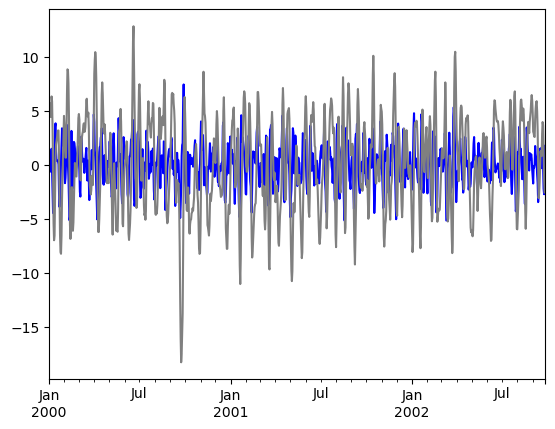

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1466.858
Date:                Fri, 04 Nov 2022   AIC                           2941.717
Time:                        11:36:30   BIC                           2961.344
Sample:                    01-01-2000   HQIC                          2949.176
                         - 09-26-2002                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9758      0.044     22.022      0.000       0.889       1.063
ar.L2         -0.4654      0.038    -12.364      0.000      -0.539      -0.392
ma.L1          0.3049      0.047      6.515      0.0

In [64]:
diff = (y - y.shift()).dropna(axis=0) #先頭のデータは NaNとなるため
diff.plot(color='b')
sig_all[:nobs-1].plot(color='gray')

#plt.savefig('fig_SM_ARIMA_ident_y_diff.png')
plt.show()

arima_result = ARIMA(y, order=(2,1,1), trend='n').fit() # 引数trendは'n'（トレンド無し）を指定
print(arima_result.summary())

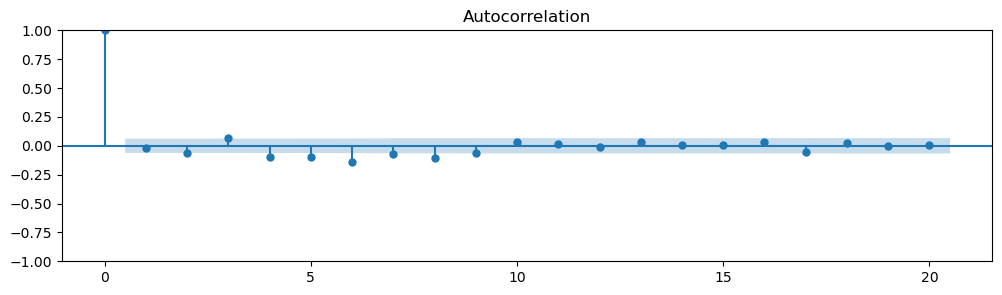

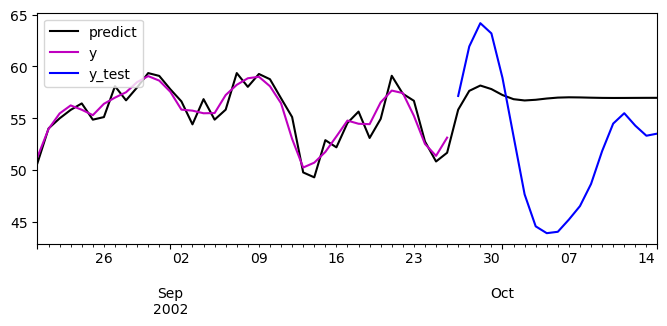

2000-01-01 00:00:00 2002-09-26 00:00:00
2002-09-27 00:00:00 2003-01-04 00:00:00


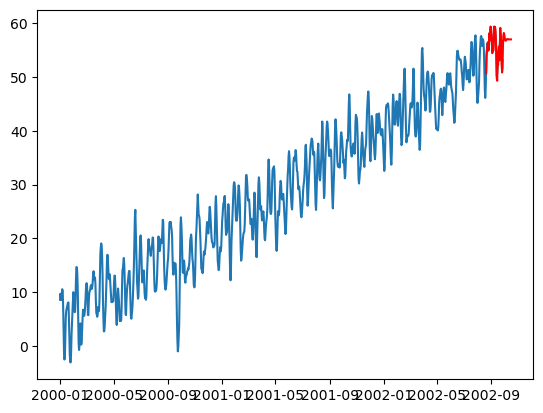

In [65]:
resid = arima_result.resid # residual sequence
sig_val = 0.05 # 有意水準

#resid.plot(figsize=(12,4))
#print(stats.normaltest(resid))

fig = plt.figure(figsize=(12,3))
ax1 = fig.add_subplot(111)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=20, alpha=sig_val, ax=ax1)

#plt.savefig('fig_SM_ARIMA_resid_acf.png')
plt.show()

fig = plt.figure(figsize=(8,3))

start, end, pred_start = '2002-08-20', '2002-10-15', '2002-09-27'
pred = arima_result.predict(start=start, end=end)
pred.plot(label='predict', color='k')
y[start:].plot(color='m', label='y')
y_test[pred_start:end].plot(color='b', label='y_test')
plt.legend(loc='upper left')

#plt.savefig('fig_SM_ARIMA_y_predict.png')
plt.show()

print(y.index[0], y.index[-1])
print(y_test.index[0], y_test.index[-1])

plt.plot(y)
plt.plot(pred, color='r')